<a href="https://colab.research.google.com/github/BetoxAlka/AnaliticaDatos_Equipo3/blob/main/Actividad3-5-2/Act3_5_2_Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 3.5.2: Limpieza de Base de Datos (Airbnb - Boston)

## Generación y Análisis Inicial del Frame

In [1]:
#Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Cargar un archivo
from google.colab import files
files.upload()

In [3]:
#Ajustar el maximo de columnas
pd.options.display.max_columns = None

In [4]:
#Ajustar el maximo de filas
pd.options.display.max_rows = None

In [5]:
#Crear DataFrame
data = pd.read_csv('listings.csv',encoding='utf-8')
data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20240622024514,2024-06-22,city scrape,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,"Mostly quiet ( no loud music, no crowed sidewa...",https://a0.muscache.com/pictures/24670/b2de044...,4804,https://www.airbnb.com/users/show/4804,Frank,2008-12-03,"Massachusetts, United States",My wife and I and grown children frequently oc...,within a day,80%,33%,t,https://a0.muscache.com/im/users/4804/profile_...,https://a0.muscache.com/im/users/4804/profile_...,East Boston,4,5,"['email', 'phone']",t,f,Neighborhood highlights,East Boston,NaN,42.36413,-71.02991,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Central air conditioning"", ""Free street park...",$125.00,29,1125,29,29,1125,1125,29.0,1125.0,NaN,t,0,12,42,317,2024-06-22,25,1,0,2015-07-10,2023-12-11,4.96,5.00,4.96,5.00,4.96,4.84,4.88,NaN,f,1,1,0,0,0.23
1,5506,https://www.airbnb.com/rooms/5506,20240622024514,2024-06-22,city scrape,** Fort Hill Inn Private! Minutes to center!**,"Private guest room with private bath, You do n...","Peaceful, Architecturally interesting, histori...",https://a0.muscache.com/pictures/miso/Hosting-...,8229,https://www.airbnb.com/users/show/8229,Terry,2009-02-19,"Boston, MA","Relaxed, Easy going, Accommodating.",within an hour,100%,99%,t,https://a0.muscache.com/im/users/8229/profile_...,https://a0.muscache.com/im/users/8229/profile_...,Roxbury,11,14,"['email', 'phone']",t,t,Neighborhood highlights,Roxbury,NaN,42.32844,-71.09581,Entire guest suite,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Fire extinguisher"", ""Free street parking"", ""...",$139.00,3,90,1,3,1125,1125,3.0,1125.0,NaN,t,6,18,31,112,2024-06-22,123,5,0,2009-03-21,2024-04-24,4.79,4.88,4.90,4.95,4.89,4.56,4.75,STR-490093,f,10,10,0,0,0.66
2,6695,https://www.airbnb.com/rooms/6695,20240622024514,2024-06-22,city scrape,"Fort Hill Inn *Sunny* 1 bedroom, condo duplex","Comfortable, Fully Equipped private apartment...","Peaceful, Architecturally interesting, histori...",https://a0.muscache.com/pictures/38ac4797-e7a4...,8229,https://www.airbnb.com/users/show/8229,Terry,2009-02-19,"Boston, MA","Relaxed, Easy going, Accommodating.",within an hour,100%,99%,t,https://a0.muscache.com/im/users/8229/profile_...,https://a0.muscache.com/im/users/8229/profile_...,Roxbury,11,14,"['email', 'phone']",t,t,Neighborhood highlights,Roxbury,NaN,42.32802,-71.09387,Entire condo,Entire home/apt,4,1.0,1 bath,0.0,2.0,"[""Fire extinguisher"", ""Free street parking"", ""...",$179.00,3,730,1,3,730,730,2.9,730.0,NaN,t,4,9,19,79,2024-06-22,128,4,0,2009-08-06,2024-04-16,4.81,4.82,4.87,4.90,4.95,4.52,4.72,STR-491702,f,10,10,0,0,0.71
3,8789,https://www.airbnb.

In [6]:
#Cantidad de filas y columnas del frame
data.shape

(4325, 75)

In [7]:
#Informacion del frame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4325 non-null   int64  
 1   listing_url                                   4325 non-null   object 
 2   scrape_id                                     4325 non-null   int64  
 3   last_scraped                                  4325 non-null   object 
 4   source                                        4325 non-null   object 
 5   name                                          4325 non-null   object 
 6   description                                   4229 non-null   object 
 7   neighborhood_overview                         2739 non-null   object 
 8   picture_url                                   4325 non-null   object 
 9   host_id                                       4325 non-null   i

In [8]:
#Conocer las columnas con valores nulos
valores_nulos = data.isnull().sum()
valores_nulos

,0
id,0
listing_url,0
scrape_id,0
last_scraped,0
source,0
name,0
description,96
neighborhood_overview,1586
picture_url,0
host_id,0


Tal y cómo se puede apreciar en los comandos anteriores, el Frame cuenta con una gran cantidad de datos, no solo en términos de registros, sino también en la variedad de columnas de datos que hay.

Cómo se puede ver en el comando anterior, varios de estos datos se encuentran con valores nulos en grandes cantidades. Por lo que para iniciar con la Limpieza, primero se eliminaran las columnas que consideremos inadecuadas dado su gran cantidad de valores nulos, o por que los datos que ofrecen son irrelevantes.

## Limpieza Parte 1: Valores Nulos

Comenzaremos por eliminar las columnas con valores nulos en cantidades exageradas, pues esto significa que los datos que ofrece la columna son inadecuados. Particularmente buscamos aquellos valores nulos que revasen entre el 20% y 25% de los datos totales.

In [9]:
#Se eliminan las columnas en un nuevo Frame utilizando la funcion drop()
data1 = data.drop(['neighborhood_overview','host_about','host_neighbourhood','neighbourhood','neighbourhood_group_cleansed','calendar_updated','license'],axis=1)
data1.head() #Cada una de las columnas eleguidas muestran que sus datos nulos son significativos y por lo tanto no son pertinentes para el analisis.

,id,listing_url,scrape_id,last_scraped,source,name,description,picture_url,host_id,host_url,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20240622024514,2024-06-22,city scrape,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,https://a0.muscache.com/pictures/24670/b2de044...,4804,https://www.airbnb.com/users/show/4804,Frank,2008-12-03,"Massachusetts, United States",within a day,80%,33%,t,https://a0.muscache.com/im/users/4804/profile_...,https://a0.muscache.com/im/users/4804/profile_...,4,5,"['email', 'phone']",t,f,East Boston,42.36413,-71.02991,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Central air conditioning"", ""Free street park...",$125.00,29,1125,29,29,1125,1125,29.0,1125.0,t,0,12,42,317,2024-06-22,25,1,0,2015-07-10,2023-12-11,4.96,5.00,4.96,5.00,4.96,4.84,4.88,f,1,1,0,0,0.23
1,5506,https://www.airbnb.com/rooms/5506,20240622024514,2024-06-22,city scrape,** Fort Hill Inn Private! Minutes to center!**,"Private guest room with private bath, You do n...",https://a0.muscache.com/pictures/miso/Hosting-...,8229,https://www.airbnb.com/users/show/8229,Terry,2009-02-19,"Boston, MA",within an hour,100%,99%,t,https://a0.muscache.com/im/users/8229/profile_...,https://a0.muscache.com/im/users/8229/profile_...,11,14,"['email', 'phone']",t,t,Roxbury,42.32844,-71.09581,Entire guest suite,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Fire extinguisher"", ""Free street parking"", ""...",$139.00,3,90,1,3,1125,1125,3.0,1125.0,t,6,18,31,112,2024-06-22,123,5,0,2009-03-21,2024-04-24,4.79,4.88,4.90,4.95,4.89,4.56,4.75,f,10,10,0,0,0.66
2,6695,https://www.airbnb.com/rooms/6695,20240622024514,2024-06-22,city scrape,"Fort Hill Inn *Sunny* 1 bedroom, condo duplex","Comfortable, Fully Equipped private apartment...",https://a0.muscache.com/pictures/38ac4797-e7a4...,8229,https://www.airbnb.com/users/show/8229,Terry,2009-02-19,"Boston, MA",within an hour,100%,99%,t,https://a0.muscache.com/im/users/8229/profile_...,https://a0.muscache.com/im/users/8229/profile_...,11,14,"['email', 'phone']",t,t,Roxbury,42.32802,-71.09387,Entire condo,Entire home/apt,4,1.0,1 bath,0.0,2.0,"[""Fire extinguisher"", ""Free street parking"", ""...",$179.00,3,730,1,3,730,730,2.9,730.0,t,4,9,19,79,2024-06-22,128,4,0,2009-08-06,2024-04-16,4.81,4.82,4.87,4.90,4.95,4.52,4.72,f,10,10,0,0,0.71
3,8789,https://www.airbnb.com/rooms/8789,20240622024514,2024-06-22,city scrape,Curved Glass Studio/1bd facing Park,This unit is for sale. There will need to be o...,https://a0.muscache.com/pictures/miso/Hosting-...,26988,https://www.airbnb.com/users/show/26988,Anne,2009-07-22,"Boston, MA",within an hour,100%,46%,t,https://a0.muscache.com/im/pictures/user/d7d71...,https://a0.muscache.com/im/pictures/user/d7d71...,12,31,"['email', 'phone']",t,t,Beacon Hill,42.35867,-71.06307,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,2.0,"[""Fire extinguisher"", ""Bed linens"", ""L

Ahora, además de limpiar las columnas con demasiados valores nulos, consideramos prudente también deshacernos de las columnas que contienen datos irrelevantes para el futuro analisis. En el caso de la base de datos actual, concluimos que las columnas con urls no debemos considerarlas para el analisis, y por lo tanto seran eliminadas también.

In [10]:
#Se eliminan las columnas en un nuevo Frame utilizando la funcion drop()
data1 = data1.drop(['listing_url','picture_url','host_url','host_thumbnail_url','host_picture_url'],axis=1)
data1.head() #Cada columna eleguida contiene urls

,id,scrape_id,last_scraped,source,name,description,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,20240622024514,2024-06-22,city scrape,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,4804,Frank,2008-12-03,"Massachusetts, United States",within a day,80%,33%,t,4,5,"['email', 'phone']",t,f,East Boston,42.36413,-71.02991,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Central air conditioning"", ""Free street park...",$125.00,29,1125,29,29,1125,1125,29.0,1125.0,t,0,12,42,317,2024-06-22,25,1,0,2015-07-10,2023-12-11,4.96,5.00,4.96,5.00,4.96,4.84,4.88,f,1,1,0,0,0.23
1,5506,20240622024514,2024-06-22,city scrape,** Fort Hill Inn Private! Minutes to center!**,"Private guest room with private bath, You do n...",8229,Terry,2009-02-19,"Boston, MA",within an hour,100%,99%,t,11,14,"['email', 'phone']",t,t,Roxbury,42.32844,-71.09581,Entire guest suite,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Fire extinguisher"", ""Free street parking"", ""...",$139.00,3,90,1,3,1125,1125,3.0,1125.0,t,6,18,31,112,2024-06-22,123,5,0,2009-03-21,2024-04-24,4.79,4.88,4.90,4.95,4.89,4.56,4.75,f,10,10,0,0,0.66
2,6695,20240622024514,2024-06-22,city scrape,"Fort Hill Inn *Sunny* 1 bedroom, condo duplex","Comfortable, Fully Equipped private apartment...",8229,Terry,2009-02-19,"Boston, MA",within an hour,100%,99%,t,11,14,"['email', 'phone']",t,t,Roxbury,42.32802,-71.09387,Entire condo,Entire home/apt,4,1.0,1 bath,0.0,2.0,"[""Fire extinguisher"", ""Free street parking"", ""...",$179.00,3,730,1,3,730,730,2.9,730.0,t,4,9,19,79,2024-06-22,128,4,0,2009-08-06,2024-04-16,4.81,4.82,4.87,4.90,4.95,4.52,4.72,f,10,10,0,0,0.71
3,8789,20240622024514,2024-06-22,city scrape,Curved Glass Studio/1bd facing Park,This unit is for sale. There will need to be o...,26988,Anne,2009-07-22,"Boston, MA",within an hour,100%,46%,t,12,31,"['email', 'phone']",t,t,Beacon Hill,42.35867,-71.06307,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,2.0,"[""Fire extinguisher"", ""Bed linens"", ""Long term...",$92.00,91,365,91,91,365,365,91.0,365.0,t,0,1,1,101,2024-06-22,29,3,0,2014-08-12,2024-05-15,4.69,4.69,4.55,4.93,4.97,4.97,4.59,f,8,8,0,0,0.24
4,10811,20240622024514,2024-06-22,city scrape,"Back Bay Apt Studio-3 blocks to Pru center & ""T""",Stunning Back Bay furnished studio apartment. ...,38997,Michelle,2009-09-16,NaN,within a day,98%,57%,f,22,29,"['email', 'phone']",t,t,Back Bay,42.35173,-71.08685,Entire rental unit,Entire home/apt,3,1.0,1 bath,0.0,1.0,"[""Fire extinguisher"", ""Bed linens"", ""Long term...",$130.00,91,1125,91,91,1125,1125,91.0,1125.0,t,29,59,89,364,2024-06-22,9,0,0,2016-01-09,2019-07-22,4.33,4.44,4.67,4.56,4.00,5.00,4.67,f,13,13,0,0,0.09


Por ultimo, gracias a la generación de datos automatica y sin repeticiones, no es necesario incluir las columnas de id en el el frame, por lo cuál tambien son eliminadas.

In [11]:
#Se eliminan las columnas en un nuevo Frame utilizando la funcion drop()
data1 = data1.drop(['id','scrape_id',],axis=1)
data1.head() #Se eliminan las columnas de id

,last_scraped,source,name,description,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2024-06-22,city scrape,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,4804,Frank,2008-12-03,"Massachusetts, United States",within a day,80%,33%,t,4,5,"['email', 'phone']",t,f,East Boston,42.36413,-71.02991,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Central air conditioning"", ""Free street park...",$125.00,29,1125,29,29,1125,1125,29.0,1125.0,t,0,12,42,317,2024-06-22,25,1,0,2015-07-10,2023-12-11,4.96,5.00,4.96,5.00,4.96,4.84,4.88,f,1,1,0,0,0.23
1,2024-06-22,city scrape,** Fort Hill Inn Private! Minutes to center!**,"Private guest room with private bath, You do n...",8229,Terry,2009-02-19,"Boston, MA",within an hour,100%,99%,t,11,14,"['email', 'phone']",t,t,Roxbury,42.32844,-71.09581,Entire guest suite,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Fire extinguisher"", ""Free street parking"", ""...",$139.00,3,90,1,3,1125,1125,3.0,1125.0,t,6,18,31,112,2024-06-22,123,5,0,2009-03-21,2024-04-24,4.79,4.88,4.90,4.95,4.89,4.56,4.75,f,10,10,0,0,0.66
2,2024-06-22,city scrape,"Fort Hill Inn *Sunny* 1 bedroom, condo duplex","Comfortable, Fully Equipped private apartment...",8229,Terry,2009-02-19,"Boston, MA",within an hour,100%,99%,t,11,14,"['email', 'phone']",t,t,Roxbury,42.32802,-71.09387,Entire condo,Entire home/apt,4,1.0,1 bath,0.0,2.0,"[""Fire extinguisher"", ""Free street parking"", ""...",$179.00,3,730,1,3,730,730,2.9,730.0,t,4,9,19,79,2024-06-22,128,4,0,2009-08-06,2024-04-16,4.81,4.82,4.87,4.90,4.95,4.52,4.72,f,10,10,0,0,0.71
3,2024-06-22,city scrape,Curved Glass Studio/1bd facing Park,This unit is for sale. There will need to be o...,26988,Anne,2009-07-22,"Boston, MA",within an hour,100%,46%,t,12,31,"['email', 'phone']",t,t,Beacon Hill,42.35867,-71.06307,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,2.0,"[""Fire extinguisher"", ""Bed linens"", ""Long term...",$92.00,91,365,91,91,365,365,91.0,365.0,t,0,1,1,101,2024-06-22,29,3,0,2014-08-12,2024-05-15,4.69,4.69,4.55,4.93,4.97,4.97,4.59,f,8,8,0,0,0.24
4,2024-06-22,city scrape,"Back Bay Apt Studio-3 blocks to Pru center & ""T""",Stunning Back Bay furnished studio apartment. ...,38997,Michelle,2009-09-16,NaN,within a day,98%,57%,f,22,29,"['email', 'phone']",t,t,Back Bay,42.35173,-71.08685,Entire rental unit,Entire home/apt,3,1.0,1 bath,0.0,1.0,"[""Fire extinguisher"", ""Bed linens"", ""Long term...",$130.00,91,1125,91,91,1125,1125,91.0,1125.0,t,29,59,89,364,2024-06-22,9,0,0,2016-01-09,2019-07-22,4.33,4.44,4.67,4.56,4.00,5.00,4.67,f,13,13,0,0,0.09


In [12]:
#Conocer las columnas con valores nulos
valores_nulos = data1.isnull().sum()
valores_nulos

,0
last_scraped,0
source,0
name,0
description,96
host_id,0
host_name,0
host_since,0
host_location,977
host_response_time,502
host_response_rate,502


Ahora que limpiamos la base de columnas innecesarias, procederemos con la sustitución de valores nulos mediante métodos que concuerden con los datos que contiene cada columna con nulos.

In [13]:
#Sustituir valores nulos con un string definido
data1['description'] = data1['description'].fillna('No description available')
#Se sustituyen los datos nulos de la columna descripcion con una descripcion predeterminada
#Esto por que simplemente se puede ver como que el registro no cuenta con una descripcion

In [14]:
#Sustituir valores nulos con un string definido
data1['host_location'] = data1['host_location'].fillna('Host Location unavailable')
#Se sustituyen los datos nulos de la columna de la ubicacion del anfitrion con un dato establecido
#Esto por que simplemente se puede ver como que el registro no cuenta con este dato

In [15]:
#Sustituir valores nulos con un string definido
data1['host_response_time'] = data1['host_response_time'].fillna('Response time unavailable')
#Se sustituyen los datos nulos de la columna de tiempo de respuesta del anfitrion con un dato establecido
#Esto por que simplemente se puede ver como que el registro no cuenta con este dato

Las siguientes columnas cuentan con valores numericos con un signo de %, el cual para un mejor analisis en el futuro, se eliminara.

In [16]:
#Eliminar un signo de una columna
data['host_response_rate'] = data['host_response_rate'].str.replace('%', '') #Se elimina en el original tambien para calculos proximos
data1['host_response_rate'] = data1['host_response_rate'].str.replace('%', '')
data1.head(1)

,last_scraped,source,name,description,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2024-06-22,city scrape,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,4804,Frank,2008-12-03,"Massachusetts, United States",within a day,80,33%,t,4,5,"['email', 'phone']",t,f,East Boston,42.36413,-71.02991,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Central air conditioning"", ""Free street park...",$125.00,29,1125,29,29,1125,1125,29.0,1125.0,t,0,12,42,317,2024-06-22,25,1,0,2015-07-10,2023-12-11,4.96,5.0,4.96,5.0,4.96,4.84,4.88,f,1,1,0,0,0.23


In [17]:
#Se repite lo mismo con la siguiente columna
data['host_acceptance_rate'] = data['host_acceptance_rate'].str.replace('%', '') #Se elimina en el original tambien para calculos proximos
data1['host_acceptance_rate'] = data1['host_acceptance_rate'].str.replace('%', '')
data1.head(1)

,last_scraped,source,name,description,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2024-06-22,city scrape,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,4804,Frank,2008-12-03,"Massachusetts, United States",within a day,80,33,t,4,5,"['email', 'phone']",t,f,East Boston,42.36413,-71.02991,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Central air conditioning"", ""Free street park...",$125.00,29,1125,29,29,1125,1125,29.0,1125.0,t,0,12,42,317,2024-06-22,25,1,0,2015-07-10,2023-12-11,4.96,5.0,4.96,5.0,4.96,4.84,4.88,f,1,1,0,0,0.23


Ahora se eliminan los datos nulos mediante el calculo de la mediana de la columna. Pero para hacerlo, se debe establecer que dichas columnas sean valores numericos y utilizar el frame original para evitar incongruencias con los promedios dada la actualizacion de los datos.

In [18]:
#Se cre un nuevo frame para este proceso
data_percentage = data.copy()
#Se eliminan los nulos de las columnas a utilizar en su totalidad (Este frame solo se utilizara para el calculo siguiente)
data_percentage = data_percentage.dropna(subset=['host_response_rate','host_acceptance_rate'])
#Se establecen las columnas como enteros
data_percentage['host_response_rate'] = data_percentage['host_response_rate'].astype(int)
data_percentage['host_acceptance_rate'] = data_percentage['host_acceptance_rate'].astype(int)

In [19]:
#Sustituir valores nulos con la media de la columna
data1['host_response_rate'] = data1['host_response_rate'].fillna(round(data_percentage['host_response_rate'].mean(),0))
#Se sustituyen los valores nulos por el promedio de la columna (del Frame original modificado anteriormente para evitar errores por la actualizacion de datos)
#Se eligio este metodo pues dada la naturaleza de la columna parece apropiado establecer un promedio en el indice de respuesa del anfitrion

In [20]:
#Sustituir valores nulos con la media de la columna
data1['host_acceptance_rate'] = data1['host_acceptance_rate'].fillna(round(data_percentage['host_acceptance_rate'].mean(),0))
#Se sustituyen los valores nulos por el promedio de la columna (del Frame original modificado anteriormente para evitar errores por la actualizacion de datos)
#Se eligio este metodo pues dada la naturaleza de la columna parece apropiado establecer un promedio en el indice de aceptacion del anfitrion

Continuamos con el resto de columnas

In [21]:
#La siguiente columna cuenta con datos cualitativos binarios (true false)
#Tomando eso en cuenta la mejor opcion para sustituir valores nulos es...
#Sustituir valores nulos con valores NO nulos hacia atras ('backwards fill')
data1['host_is_superhost'] = data1['host_is_superhost'].fillna(method='bfill')
#Se utiliza el metodo backwards fill para sustituir valores nulos binarios, pues ingresar un dato diferente significaria romper esta cualidad de la columna

<ipython-input-21-fbcabd8eb670>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data1['host_is_superhost'] = data1['host_is_superhost'].fillna(method='bfill')


In [22]:
#Sustituimos los valores nulos con el promedio de la columna
data1['bathrooms'] = data1['bathrooms'].fillna(round(data['bathrooms'].mean(),0))
#Se sustituyen los valores nulos por el promedio de la columna (del Frame original modificado anteriormente para evitar errores por la actualizacion de datos)
#Se eligio este metodo pues dada la naturaleza de la columna parece apropiado establecer un promedio en la cantidad de banios

In [23]:
#Sustituimos los valores nulos con el promedio de la columna
data1['bedrooms'] = data1['bedrooms'].fillna(round(data['bedrooms'].mean(),0))
#Se sustituyen los valores nulos por el promedio de la columna (del Frame original modificado anteriormente para evitar errores por la actualizacion de datos)
#Se eligio este metodo pues dada la naturaleza de la columna parece apropiado establecer un promedio en la cantidad de cuartos

In [24]:
#Sustituimos los valores nulos con el promedio de la columna
data1['beds'] = data1['beds'].fillna(round(data['beds'].mean(),0))
#Se sustituyen los valores nulos por el promedio de la columna (del Frame original modificado anteriormente para evitar errores por la actualizacion de datos)
#Se eligio este metodo pues dada la naturaleza de la columna parece apropiado establecer un promedio en la cantidad de camas

La siguiente columna contiene nuevamente un simbolo extraño junto a un numero, en este caso $ y comas (,), por lo que repetimos el proceso anterior.

In [25]:
#Eliminar un signo de una columna
data['price'] = data['price'].str.replace('$', '') #Se elimina en el original tambien para calculos proximos
data1['price'] = data1['price'].str.replace('$', '')
data['price'] = data['price'].str.replace(',', '') #Se elimina en el original tambien para calculos proximos
data1['price'] = data1['price'].str.replace(',', '')
data1.head(1)

,last_scraped,source,name,description,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2024-06-22,city scrape,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,4804,Frank,2008-12-03,"Massachusetts, United States",within a day,80,33,t,4,5,"['email', 'phone']",t,f,East Boston,42.36413,-71.02991,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Central air conditioning"", ""Free street park...",125.00,29,1125,29,29,1125,1125,29.0,1125.0,t,0,12,42,317,2024-06-22,25,1,0,2015-07-10,2023-12-11,4.96,5.0,4.96,5.0,4.96,4.84,4.88,f,1,1,0,0,0.23


In [26]:
#Se cre un nuevo frame para este proceso
data_price = data.copy()
#Se eliminan los nulos de las columnas a utilizar en su totalidad (Este frame solo se utilizara para el calculo siguiente)
data_price = data_price.dropna(subset=['price'])
#Se establece la columna con valores numericos
data_price['price'] = data_price['price'].astype(float)

In [27]:
#Sustituir valores nulos con la media de la columna
data1['price'] = data1['price'].fillna(round(data_price['price'].mean(),2))
#Se sustituyen los valores nulos por el promedio de la columna (del Frame original modificado anteriormente para evitar errores por la actualizacion de datos)
#Se eligio este metodo pues dada la naturaleza de la columna parece apropiado establecer un promedio en el precio

In [28]:
#La siguiente columna cuenta con datos cualitativos binarios (true false)
#Tomando eso en cuenta la mejor opcion para sustituir valores nulos es...
#Sustituir valores nulos con valores NO nulos hacia atras ('backwards fill')
data1['has_availability'] = data1['has_availability'].fillna(method='bfill')
#Se utiliza el metodo backwards fill para sustituir valores nulos binarios, pues ingresar un dato diferente significaria romper esta cualidad de la columna

<ipython-input-28-7752b5f28e94>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data1['has_availability'] = data1['has_availability'].fillna(method='bfill')


In [29]:
#Las siguientes dos columnas contienen fechas
#Por lo que la sustitucion mas apropiada seria colocando una fecha establecida exagerada
data1['first_review'] = data1['first_review'].fillna('2030-12-31')
#Se establece una fecha imposible para establecer el registro con un dato congruente con el resto
#Pero al mismo tiempo que muestre que los datos no fueron correctamente registrados

In [30]:
#Las siguientes dos columnas contienen fechas
#Por lo que la sustitucion mas apropiada seria colocando una fecha establecida exagerada
data1['last_review'] = data1['last_review'].fillna('2030-12-31')
#Se establece una fecha imposible para establecer el registro con un dato congruente con el resto
#Pero al mismo tiempo que muestre que los datos no fueron correctamente registrados

Las siguientes columnas son de valores flotantes, por lo que el calculo del promedio para cada una y sus valores nulos es pertinente

In [31]:
#Sustituimos los valores nulos con el promedio de la columna
data1['review_scores_rating'] = data1['review_scores_rating'].fillna(round(data['review_scores_rating'].mean(),2))
#Se sustituyen los valores nulos por el promedio de la columna (del Frame original modificado anteriormente para evitar errores por la actualizacion de datos)
#Se eligio este metodo pues dada la naturaleza de la columna parece apropiado establecer un promedio en el indice de reviews

In [32]:
#Sustituimos los valores nulos con el promedio de la columna
data1['review_scores_accuracy'] = data1['review_scores_accuracy'].fillna(round(data['review_scores_accuracy'].mean(),2))
#Se sustituyen los valores nulos por el promedio de la columna (del Frame original modificado anteriormente para evitar errores por la actualizacion de datos)
#Se eligio este metodo pues dada la naturaleza de la columna parece apropiado establecer un promedio en el indice de exactitud de reviews

In [33]:
#Sustituimos los valores nulos con el promedio de la columna
data1['review_scores_cleanliness'] = data1['review_scores_cleanliness'].fillna(round(data['review_scores_cleanliness'].mean(),2))
#Se sustituyen los valores nulos por el promedio de la columna (del Frame original modificado anteriormente para evitar errores por la actualizacion de datos)
#Se eligio este metodo pues dada la naturaleza de la columna parece apropiado establecer un promedio en el indice de limpieza de reviews

In [34]:
#Sustituimos los valores nulos con el promedio de la columna
data1['review_scores_checkin'] = data1['review_scores_checkin'].fillna(round(data['review_scores_checkin'].mean(),2))
#Se sustituyen los valores nulos por el promedio de la columna (del Frame original modificado anteriormente para evitar errores por la actualizacion de datos)
#Se eligio este metodo pues dada la naturaleza de la columna parece apropiado establecer un promedio en el indice de reviews de registros

In [35]:
#Sustituimos los valores nulos con el promedio de la columna
data1['review_scores_communication'] = data1['review_scores_communication'].fillna(round(data['review_scores_communication'].mean(),2))
#Se sustituyen los valores nulos por el promedio de la columna (del Frame original modificado anteriormente para evitar errores por la actualizacion de datos)
#Se eligio este metodo pues dada la naturaleza de la columna parece apropiado establecer un promedio en el indice de comunicacion de reviews

In [36]:
#Sustituimos los valores nulos con el promedio de la columna
data1['review_scores_location'] = data1['review_scores_location'].fillna(round(data['review_scores_location'].mean(),2))
#Se sustituyen los valores nulos por el promedio de la columna (del Frame original modificado anteriormente para evitar errores por la actualizacion de datos)
#Se eligio este metodo pues dada la naturaleza de la columna parece apropiado establecer un promedio en el indice de ubicacion de reviews

In [37]:
#Sustituimos los valores nulos con el promedio de la columna
data1['review_scores_value'] = data1['review_scores_value'].fillna(round(data['review_scores_value'].mean(),2))
#Se sustituyen los valores nulos por el promedio de la columna (del Frame original modificado anteriormente para evitar errores por la actualizacion de datos)
#Se eligio este metodo pues dada la naturaleza de la columna parece apropiado establecer un promedio en el indice de calificacion de reviews

In [38]:
#Sustituimos los valores nulos con el promedio de la columna
data1['reviews_per_month'] = data1['reviews_per_month'].fillna(round(data['reviews_per_month'].mean(),2))
#Se sustituyen los valores nulos por el promedio de la columna (del Frame original modificado anteriormente para evitar errores por la actualizacion de datos)
#Se eligio este metodo pues dada la naturaleza de la columna parece apropiado establecer un promedio en el indice de calificacion de reviews

Finalmente corroboramos que los datos nulos hayan sido limpiados

In [39]:
valores_nulos = data1.isnull().sum()
valores_nulos

,0
last_scraped,0
source,0
name,0
description,0
host_id,0
host_name,0
host_since,0
host_location,0
host_response_time,0
host_response_rate,0


## Limpieza Parte 2: Valores Atípicos

Incluso tras la limpieza de los valores nulos, dentro de los datos cabe la posibilidad de que se encuentren registros fuera de lo comun (Incluso fuera de aquellos establecido durante la limpieza anterior). Por lo tanto, la limpieza de Valores Atípicos también es pertinente, y se realizara a continuación

In [40]:
#Informacion del frame
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 61 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  4325 non-null   object 
 1   source                                        4325 non-null   object 
 2   name                                          4325 non-null   object 
 3   description                                   4325 non-null   object 
 4   host_id                                       4325 non-null   int64  
 5   host_name                                     4325 non-null   object 
 6   host_since                                    4325 non-null   object 
 7   host_location                                 4325 non-null   object 
 8   host_response_time                            4325 non-null   object 
 9   host_response_rate                            4325 non-null   o

Para poder trabajar con los valores atípicos se deben dividir las columnas entre diferentes frames, uno que contenga datos cualitativos y otro con valores cuantitativos, estos últimos serán los que analizemos.

Para lograrlo, primero deberemos establecer los tipos de datos correctos para cada columna respecto a su contenido.

In [41]:
#Convertimos los datos de las columnas a su tipo pertinente
data1['host_response_rate'] = data1['host_response_rate'].astype(int)
data1['host_acceptance_rate'] = data1['host_acceptance_rate'].astype(int)
data1['price'] = data1['price'].astype(float)
#Estas serian las tres columnas cuyo tipo de dato no era correcto
#Esto ocurrio gracias a las modificaciones realizadas durante la limpieza

In [42]:
#Informacion del frame
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 61 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  4325 non-null   object 
 1   source                                        4325 non-null   object 
 2   name                                          4325 non-null   object 
 3   description                                   4325 non-null   object 
 4   host_id                                       4325 non-null   int64  
 5   host_name                                     4325 non-null   object 
 6   host_since                                    4325 non-null   object 
 7   host_location                                 4325 non-null   object 
 8   host_response_time                            4325 non-null   object 
 9   host_response_rate                            4325 non-null   i

Ahora que cada columna contiene un valor adecuado, es momento de separarlos en los frames cualitativos y cuantitativos.

Para poder hacer esto, primero es necesario dividir los cuantitativos en diferentes rangos, pues es posible que entre ellos existan valores demasiado altos o demasiado bajos.

In [43]:
#Valores maximos y minimos de cada columna
data_maxmin = [data1.min(), data1.max()]

In [44]:
#Muestra minimos
data_maxmin[0]

,0
last_scraped,2024-06-22
source,city scrape
name,"""Casita"" on the Water - Harbor View"
description,"""Discover comfort and convenience in this deli..."
host_id,4804
host_name,A And L
host_since,2008-12-03
host_location,"Acton, MA"
host_response_time,Response time unavailable
host_response_rate,0


In [45]:
#Muestra maximos
data_maxmin[1]

,0
last_scraped,2024-06-22
source,previous scrape
name,💎Newly Renovated🌳Walk to MGH🏨Luxe🌻Sanitized🌿
description,💐This is the most sought after and most expens...
host_id,583290692
host_name,Zvi
host_since,2024-06-13
host_location,"Winthrop, MA"
host_response_time,within an hour
host_response_rate,100


Con los datos anteriores, dividimos los valores cuantitativos y cualitativos en diferentes frames para trabajar de manera más eficaz con ellos. Cada uno de los cuantitativos representan un rango de datos que varian desde muy pequeños, medianos, grandes o exageradamente grandes.

In [46]:
#Se divide el dataframe en varios dataframes para  poder procesr los outliers
cuantitativas_A = data1[['accommodates','bathrooms','bedrooms','beds','availability_30','number_of_reviews_l30d','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','calculated_host_listings_count_shared_rooms','reviews_per_month']] #Rango de valores muy pequenios
cuantitativas_B = data1[['host_response_rate','host_acceptance_rate','latitude','longitude','minimum_nights','minimum_minimum_nights','maximum_minimum_nights','minimum_nights_avg_ntm','availability_60','availability_90','availability_365','number_of_reviews_ltm','calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms']] #Rango de valores medianos
cuantitativas_C = data1[['host_listings_count','host_total_listings_count','price','maximum_nights','number_of_reviews']] #Rango de valores grandes
cuantitativas_D = data1[['host_id','minimum_maximum_nights','maximum_maximum_nights','maximum_nights_avg_ntm']] #Rango de valores demasiado grandes
cualitativas = data1[['last_scraped','source','name','description','host_name','host_since','host_location','host_response_time','host_is_superhost','host_verifications','host_has_profile_pic','host_identity_verified','neighbourhood_cleansed','property_type','room_type','bathrooms_text','amenities','has_availability','calendar_last_scraped','first_review','last_review','instant_bookable']]

<Figure size 1500x800 with 0 Axes>

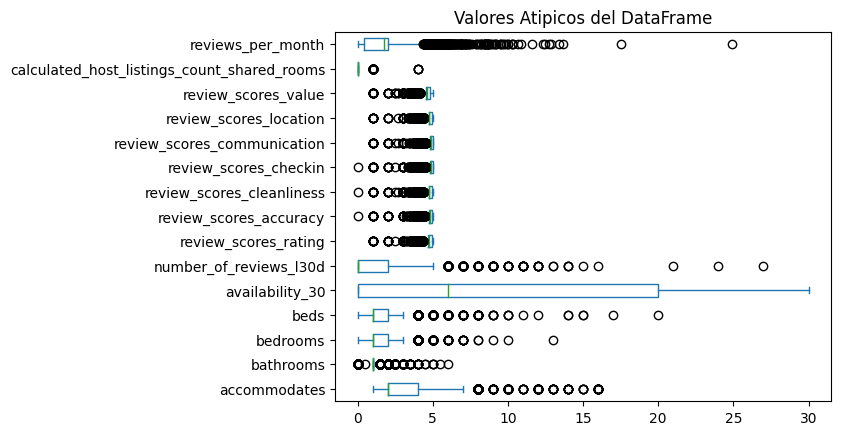

In [47]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe cuantitativo A
fig = plt.figure(figsize = (15,8))
cuantitativas_A.plot(kind='box', vert=False)
plt.title('Valores Atipicos del DataFrame')
plt.show() #Dibujamos el diagrama

Cómo se puede apreciar, la mayoría de las columnas de valores pequeños poseen valores atípicos demasiado significativos.

<Figure size 1500x800 with 0 Axes>

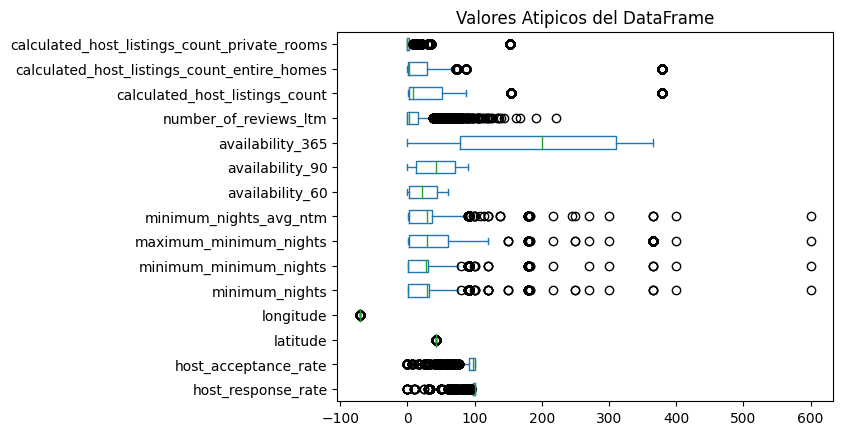

In [48]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe cuantitativo B
fig = plt.figure(figsize = (15,8))
cuantitativas_B.plot(kind='box', vert=False)
plt.title('Valores Atipicos del DataFrame')
plt.show() #Dibujamos el diagrama

Cómo se puede apreciar en el gráfico, podemos ver cómo prácticamente todas las columnas de valores medianos poseen valores atípicos exagaradamente notorios.

<Figure size 1500x800 with 0 Axes>

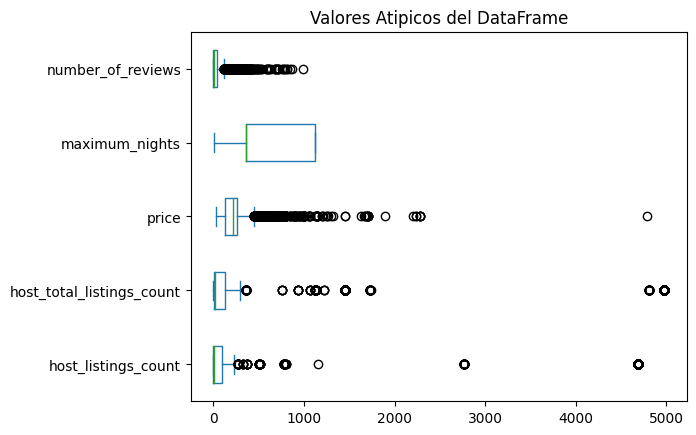

In [49]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe cuantitativo C
fig = plt.figure(figsize = (15,8))
cuantitativas_C.plot(kind='box', vert=False)
plt.title('Valores Atipicos del DataFrame')
plt.show() #Dibujamos el diagrama

Asimismo, los datos de valores grandes muestran un comportamiento similar, con la presencia de valores demasiado grandes incluso para el rango establecido siendo algo notorio.

<Figure size 1500x800 with 0 Axes>

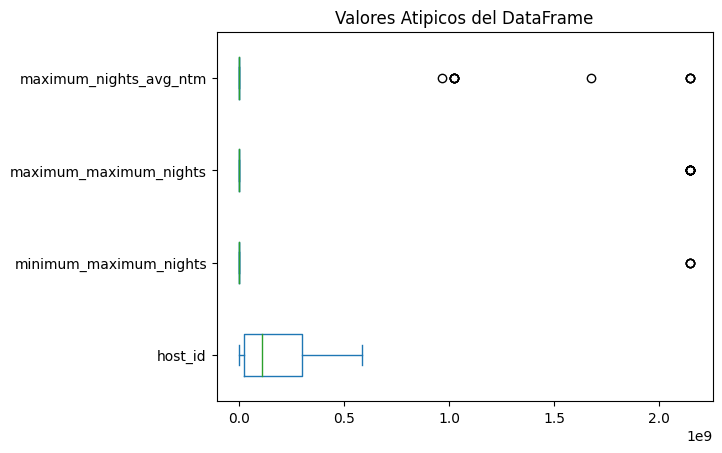

In [50]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe cuantitativo D
fig = plt.figure(figsize = (15,8))
cuantitativas_D.plot(kind='box', vert=False)
plt.title('Valores Atipicos del DataFrame')
plt.show() #Dibujamos el diagrama

Por último, incluso los valores exageradamente grandes poseen valores muy pequeños, por lo que sus valores atípicos son más que evidentes.

Ahora que tenemos bien identificados los valores atípicos gracias a su muestra gráfica, es momento de establecer y utilizar el método para limpiar valores atípicos.

Con el fin de limpiar la mayor cantidad de valores átipicos posible, utilizaremos el método aplicando cuartiles.

Comenzaremos con el frame de cuantitativos A

In [51]:
#Metodo aplicando Cuartiles, Encuentro cuartiles 0.25 y 0.75
y = cuantitativas_A

percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3
iqr = percentile75 - percentile25

Limite_Superior_iqr = percentile75 + 1.5*iqr
Limite_Inferior_iqr = percentile25 - 1.5*iqr
print('Limite superior permitido:\n',Limite_Superior_iqr)
print()
print('Limite inferior permitido:\n',Limite_Inferior_iqr)

Limite superior permitido:
 accommodates                                    7.000
bathrooms                                       1.000
bedrooms                                        3.500
beds                                            3.500
availability_30                                50.000
number_of_reviews_l30d                          5.000
review_scores_rating                            5.260
review_scores_accuracy                          5.235
review_scores_cleanliness                       5.280
review_scores_checkin                           5.255
review_scores_communication                     5.270
review_scores_location                          5.275
review_scores_value                             5.185
calculated_host_listings_count_shared_rooms     0.000
reviews_per_month                               4.380
dtype: float64

Limite inferior permitido:
 accommodates                                   -1.000
bathrooms                                       1.000
bedrooms  

In [52]:
#Obtenemos datos limpios del DataFrame
data2_A = cuantitativas_A[(y <= Limite_Superior_iqr) & (y >= Limite_Inferior_iqr)]
data2_A.head()

,accommodates,bathrooms,bedrooms,beds,availability_30,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2.0,1.0,1.0,1.0,0,0.0,4.96,5.00,4.96,5.00,4.96,4.84,4.88,0.0,0.23
1,2.0,1.0,1.0,1.0,6,0.0,4.79,4.88,4.90,4.95,4.89,4.56,4.75,0.0,0.66
2,4.0,1.0,0.0,2.0,4,0.0,4.81,4.82,4.87,4.90,4.95,4.52,4.72,0.0,0.71
3,2.0,1.0,1.0,2.0,0,0.0,4.69,4.69,4.55,4.93,4.97,4.97,4.59,0.0,0.24
4,3.0,1.0,0.0,1.0,29,0.0,NaN,NaN,4.67,NaN,NaN,5.00,4.67,0.0,0.09


In [53]:
#Corroboramos los valores nulos
valores_nulos = data2_A.isnull().sum()
valores_nulos

,0
accommodates,275
bathrooms,1041
bedrooms,273
beds,329
availability_30,0
number_of_reviews_l30d,220
review_scores_rating,390
review_scores_accuracy,364
review_scores_cleanliness,381
review_scores_checkin,298


In [54]:
#Reemplazamos valores atipicos (nulos) del dataframe con "mean"
#Realizamos una copia del DataFrame
data_clean_A = data2_A.copy()
data_clean_A = data_clean_A.fillna(round(data2_A.mean(),2))

Se sigue el mismo proceso para los demas frames.

Cuantitativo B

In [55]:
#Metodo aplicando Cuartiles, Encuentro cuartiles 0.25 y 0.75
y = cuantitativas_B

percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3
iqr = percentile75 - percentile25

Limite_Superior_iqr = percentile75 + 1.5*iqr
Limite_Inferior_iqr = percentile25 - 1.5*iqr
print('Limite superior permitido:\n',Limite_Superior_iqr)
print()
print('Limite inferior permitido:\n',Limite_Inferior_iqr)

Limite superior permitido:
 host_response_rate                              103.000000
host_acceptance_rate                            113.500000
latitude                                         42.400747
longitude                                       -71.004250
minimum_nights                                   78.500000
minimum_minimum_nights                           76.000000
maximum_minimum_nights                          145.500000
minimum_nights_avg_ntm                           88.250000
availability_60                                 105.500000
availability_90                                 159.500000
availability_365                                660.500000
number_of_reviews_ltm                            37.500000
calculated_host_listings_count                  124.500000
calculated_host_listings_count_entire_homes      71.000000
calculated_host_listings_count_private_rooms      7.500000
dtype: float64

Limite inferior permitido:
 host_response_rate                         

In [56]:
#Obtenemos datos limpios del DataFrame
data2_B = cuantitativas_B[(y <= Limite_Superior_iqr) & (y >= Limite_Inferior_iqr)]
data2_B.head()

,host_response_rate,host_acceptance_rate,latitude,longitude,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_nights_avg_ntm,availability_60,availability_90,availability_365,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms
0,NaN,NaN,42.36413,-71.02991,29.0,29.0,29.0,29.0,12,42,317,1.0,1.0,1.0,0.0
1,100.0,99.0,42.32844,-71.09581,3.0,1.0,3.0,3.0,18,31,112,5.0,10.0,10.0,0.0
2,100.0,99.0,42.32802,-71.09387,3.0,1.0,3.0,2.9,9,19,79,4.0,10.0,10.0,0.0
3,100.0,NaN,42.35867,-71.06307,NaN,NaN,91.0,NaN,1,1,101,3.0,8.0,8.0,0.0
4,98.0,NaN,42.35173,-71.08685,NaN,NaN,91.0,NaN,59,89,364,0.0,13.0,13.0,0.0


In [57]:
#Corroboramos los valores nulos
valores_nulos = data2_B.isnull().sum()
valores_nulos

,0
host_response_rate,426
host_acceptance_rate,451
latitude,126
longitude,111
minimum_nights,716
minimum_minimum_nights,707
maximum_minimum_nights,368
minimum_nights_avg_ntm,709
availability_60,0
availability_90,0


In [58]:
#Reemplazamos valores atipicos (nulos) del dataframe con "mean"
#Realizamos una copia del DataFrame
data_clean_B = data2_B.copy()
data_clean_B = data_clean_B.fillna(round(data2_B.mean(),2))

Cuantitativos C

In [59]:
#Metodo aplicando Cuartiles, Encuentro cuartiles 0.25 y 0.75
y = cuantitativas_C

percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3
iqr = percentile75 - percentile25

Limite_Superior_iqr = percentile75 + 1.5*iqr
Limite_Inferior_iqr = percentile25 - 1.5*iqr
print('Limite superior permitido:\n',Limite_Superior_iqr)
print()
print('Limite inferior permitido:\n',Limite_Inferior_iqr)

Limite superior permitido:
 host_listings_count           232.0
host_total_listings_count     315.5
price                         447.5
maximum_nights               2265.0
number_of_reviews             113.5
dtype: float64

Limite inferior permitido:
 host_listings_count         -136.0
host_total_listings_count   -184.5
price                        -60.5
maximum_nights              -775.0
number_of_reviews            -66.5
dtype: float64


In [60]:
#Obtenemos datos limpios del DataFrame
data2_C = cuantitativas_C[(y <= Limite_Superior_iqr) & (y >= Limite_Inferior_iqr)]
data2_C.head()

,host_listings_count,host_total_listings_count,price,maximum_nights,number_of_reviews
0,4.0,5.0,125.0,1125,25.0
1,11.0,14.0,139.0,90,NaN
2,11.0,14.0,179.0,730,NaN
3,12.0,31.0,92.0,365,29.0
4,22.0,29.0,130.0,1125,9.0


In [61]:
#Corroboramos los valores nulos
valores_nulos = data2_C.isnull().sum()
valores_nulos

,0
host_listings_count,507
host_total_listings_count,712
price,366
maximum_nights,0
number_of_reviews,551


In [62]:
#Reemplazamos valores atipicos (nulos) del dataframe con "mean"
#Realizamos una copia del DataFrame
data_clean_C = data2_C.copy()
data_clean_C = data_clean_C.fillna(round(data2_C.mean(),2))

Cuantitativos D

In [63]:
#Metodo aplicando Cuartiles, Encuentro cuartiles 0.25 y 0.75
y = cuantitativas_D

percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3
iqr = percentile75 - percentile25

Limite_Superior_iqr = percentile75 + 1.5*iqr
Limite_Inferior_iqr = percentile25 - 1.5*iqr
print('Limite superior permitido:\n',Limite_Superior_iqr)
print()
print('Limite inferior permitido:\n',Limite_Inferior_iqr)

Limite superior permitido:
 host_id                   710837785.5
minimum_maximum_nights         2265.0
maximum_maximum_nights         2265.0
maximum_nights_avg_ntm         2265.0
dtype: float64

Limite inferior permitido:
 host_id                  -390436154.5
minimum_maximum_nights         -775.0
maximum_maximum_nights         -775.0
maximum_nights_avg_ntm         -775.0
dtype: float64


In [64]:
#Obtenemos datos limpios del DataFrame
data2_D = cuantitativas_D[(y <= Limite_Superior_iqr) & (y >= Limite_Inferior_iqr)]
data2_D.head()

,host_id,minimum_maximum_nights,maximum_maximum_nights,maximum_nights_avg_ntm
0,4804,1125.0,1125.0,1125.0
1,8229,1125.0,1125.0,1125.0
2,8229,730.0,730.0,730.0
3,26988,365.0,365.0,365.0
4,38997,1125.0,1125.0,1125.0


In [65]:
#Corroboramos los valores nulos
valores_nulos = data2_D.isnull().sum()
valores_nulos

,0
host_id,0
minimum_maximum_nights,4
maximum_maximum_nights,12
maximum_nights_avg_ntm,12


In [66]:
#Reemplazamos valores atipicos (nulos) del dataframe con "mean"
#Realizamos una copia del DataFrame
data_clean_D = data2_D.copy()
data_clean_D = data_clean_D.fillna(round(data2_D.mean(),2))

In [67]:
#Unimos los dataframes cuantitativos limpios con el dataframe cualitativo
datos_limpios = pd.concat([cualitativas, data_clean_A, data_clean_B, data_clean_C, data_clean_D], axis=1)
datos_limpios.head()

,last_scraped,source,name,description,host_name,host_since,host_location,host_response_time,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable,accommodates,bathrooms,bedrooms,beds,availability_30,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate,host_acceptance_rate,latitude,longitude,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_nights_avg_ntm,availability_60,availability_90,availability_365,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,host_listings_count,host_total_listings_count,price,maximum_nights,number_of_reviews,host_id,minimum_maximum_nights,maximum_maximum_nights,maximum_nights_avg_ntm
0,2024-06-22,city scrape,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,Frank,2008-12-03,"Massachusetts, United States",within a day,t,"['email', 'phone']",t,f,East Boston,Entire rental unit,Entire home/apt,1 bath,"[""Central air conditioning"", ""Free street park...",t,2024-06-22,2015-07-10,2023-12-11,f,2.0,1.0,1.0,1.0,0,0.0,4.96,5.00,4.96,5.00,4.96,4.84,4.88,0.0,0.23,99.4,96.02,42.36413,-71.02991,29.00,29.00,29.0,29.00,12,42,317,1.0,1.0,1.0,0.0,4.0,5.0,125.0,1125,25.0,4804,1125.0,1125.0,1125.0
1,2024-06-22,city scrape,** Fort Hill Inn Private! Minutes to center!**,"Private guest room with private bath, You do n...",Terry,2009-02-19,"Boston, MA",within an hour,t,"['email', 'phone']",t,t,Roxbury,Entire guest suite,Entire home/apt,1 bath,"[""Fire extinguisher"", ""Free street parking"", ""...",t,2024-06-22,2009-03-21,2024-04-24,f,2.0,1.0,1.0,1.0,6,0.0,4.79,4.88,4.90,4.95,4.89,4.56,4.75,0.0,0.66,100.0,99.00,42.32844,-71.09581,3.00,1.00,3.0,3.00,18,31,112,5.0,10.0,10.0,0.0,11.0,14.0,139.0,90,18.1,8229,1125.0,1125.0,1125.0
2,2024-06-22,city scrape,"Fort Hill Inn *Sunny* 1 bedroom, condo duplex","Comfortable, Fully Equipped private apartment...",Terry,2009-02-19,"Boston, MA",within an hour,t,"['email', 'phone']",t,t,Roxbury,Entire condo,Entire home/apt,1 bath,"[""Fire extinguisher"", ""Free street parking"", ""...",t,2024-06-22,2009-08-06,2024-04-16,f,4.0,1.0,0.0,2.0,4,0.0,4.81,4.82,4.87,4.90,4.95,4.52,4.72,0.0,0.71,100.0,99.00,42.32802,-71.09387,3.00,1.00,3.0,2.90,9,19,79,4.0,10.0,10.0,0.0,11.0,14.0,179.0,730,18.1,8229,730.0,730.0,730.0
3,2024-06-22,city scrape,Curved Glass Studio/1bd facing Park,This unit is for sale. There will need to be o...,Anne,2009-07-22,"Boston, MA",within an hour,t,"['email', 'phone']",t,t,Beacon Hill,Entire rental unit,Entire home/apt,1 bath,"[""Fire extinguisher"", ""Bed linens"", ""Long term...",t,2024-06-22,2014-08-12,2024-05-15,f,2.0,1.0,1.0,2.0,0,0.0,4.69,4.69,4.55,4.93,4.97,4.97,4.59,0.0,0.24,100.0,96.02,42.35867,-71.06307,14.12,13.24,91.0,15.22,1,1,101,3.0,8.0,8.0,0.0,12.0,31.0,92.0,365,29.0,26988,365.0,365.0,365.0
4,2024-06-22,city scrape,"Back Bay Apt Studio-3 blocks to Pru center & ""T""",Stunning Back Bay furnished studio apartment. ...,Michelle,2009-09-16,Host Location unavailable,within a day,f,"['email', 'phone']",t,t,Back Bay,Entire rental unit,Entire home/apt,1 bath,"[""Fire extinguisher"", ""Bed linens"", ""Long term...",t,2024-06-22,2016-01-09,2019-07-22,f,3.0,1.0,0.0,1.0,29,0.0,4.80,4.84,4.67,4.90,4.89,5.00,4.67,0.0,0.09,98.0,96.02,42.35173,-71.08685,14.12,13.24,91.0,15.22,59,89,364,0.0,13.0,13.0,0.0,22.0,29.0,130.0,1125,9.0,38997,1125.0,1125.0,1125.0


In [68]:
valores_nulos = datos_limpios.isnull().sum()

Finalmente, se consigue un Frame completamente limpio de Valores Nulos y de Valores Átipicos listo para ser utilizado en analísis posteriores.

In [69]:
datos_limpios.head()

,last_scraped,source,name,description,host_name,host_since,host_location,host_response_time,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable,accommodates,bathrooms,bedrooms,beds,availability_30,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate,host_acceptance_rate,latitude,longitude,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_nights_avg_ntm,availability_60,availability_90,availability_365,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,host_listings_count,host_total_listings_count,price,maximum_nights,number_of_reviews,host_id,minimum_maximum_nights,maximum_maximum_nights,maximum_nights_avg_ntm
0,2024-06-22,city scrape,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,Frank,2008-12-03,"Massachusetts, United States",within a day,t,"['email', 'phone']",t,f,East Boston,Entire rental unit,Entire home/apt,1 bath,"[""Central air conditioning"", ""Free street park...",t,2024-06-22,2015-07-10,2023-12-11,f,2.0,1.0,1.0,1.0,0,0.0,4.96,5.00,4.96,5.00,4.96,4.84,4.88,0.0,0.23,99.4,96.02,42.36413,-71.02991,29.00,29.00,29.0,29.00,12,42,317,1.0,1.0,1.0,0.0,4.0,5.0,125.0,1125,25.0,4804,1125.0,1125.0,1125.0
1,2024-06-22,city scrape,** Fort Hill Inn Private! Minutes to center!**,"Private guest room with private bath, You do n...",Terry,2009-02-19,"Boston, MA",within an hour,t,"['email', 'phone']",t,t,Roxbury,Entire guest suite,Entire home/apt,1 bath,"[""Fire extinguisher"", ""Free street parking"", ""...",t,2024-06-22,2009-03-21,2024-04-24,f,2.0,1.0,1.0,1.0,6,0.0,4.79,4.88,4.90,4.95,4.89,4.56,4.75,0.0,0.66,100.0,99.00,42.32844,-71.09581,3.00,1.00,3.0,3.00,18,31,112,5.0,10.0,10.0,0.0,11.0,14.0,139.0,90,18.1,8229,1125.0,1125.0,1125.0
2,2024-06-22,city scrape,"Fort Hill Inn *Sunny* 1 bedroom, condo duplex","Comfortable, Fully Equipped private apartment...",Terry,2009-02-19,"Boston, MA",within an hour,t,"['email', 'phone']",t,t,Roxbury,Entire condo,Entire home/apt,1 bath,"[""Fire extinguisher"", ""Free street parking"", ""...",t,2024-06-22,2009-08-06,2024-04-16,f,4.0,1.0,0.0,2.0,4,0.0,4.81,4.82,4.87,4.90,4.95,4.52,4.72,0.0,0.71,100.0,99.00,42.32802,-71.09387,3.00,1.00,3.0,2.90,9,19,79,4.0,10.0,10.0,0.0,11.0,14.0,179.0,730,18.1,8229,730.0,730.0,730.0
3,2024-06-22,city scrape,Curved Glass Studio/1bd facing Park,This unit is for sale. There will need to be o...,Anne,2009-07-22,"Boston, MA",within an hour,t,"['email', 'phone']",t,t,Beacon Hill,Entire rental unit,Entire home/apt,1 bath,"[""Fire extinguisher"", ""Bed linens"", ""Long term...",t,2024-06-22,2014-08-12,2024-05-15,f,2.0,1.0,1.0,2.0,0,0.0,4.69,4.69,4.55,4.93,4.97,4.97,4.59,0.0,0.24,100.0,96.02,42.35867,-71.06307,14.12,13.24,91.0,15.22,1,1,101,3.0,8.0,8.0,0.0,12.0,31.0,92.0,365,29.0,26988,365.0,365.0,365.0
4,2024-06-22,city scrape,"Back Bay Apt Studio-3 blocks to Pru center & ""T""",Stunning Back Bay furnished studio apartment. ...,Michelle,2009-09-16,Host Location unavailable,within a day,f,"['email', 'phone']",t,t,Back Bay,Entire rental unit,Entire home/apt,1 bath,"[""Fire extinguisher"", ""Bed linens"", ""Long term...",t,2024-06-22,2016-01-09,2019-07-22,f,3.0,1.0,0.0,1.0,29,0.0,4.80,4.84,4.67,4.90,4.89,5.00,4.67,0.0,0.09,98.0,96.02,42.35173,-71.08685,14.12,13.24,91.0,15.22,59,89,364,0.0,13.0,13.0,0.0,22.0,29.0,130.0,1125,9.0,38997,1125.0,1125.0,1125.0


## Generar Archivo Final

In [70]:
#Convertir DataFrame a csv
datos_limpios.to_csv('boston_listings_clean.csv')

In [71]:
#Descargar archivo filtrado en csv
from google.colab import files

files.download('boston_listings_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>